<h1><center>CSEN1022:Assignment 2</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Hesham Abdulhamid 

GUC-ID: 43-1684

Elective Tutorial No.: T-06

**Member 2**

Name: Muhammed Ehab

GUC-ID: 43-7667

Elective Tutorial No.: T-02

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
confusion_matrices_nb = []
confusion_matrices_gm = []

## Read Data

In [34]:
# X_train, X_test
from PIL import Image

def our_reshapeColors(image_array): 
    image_reshaped = np.zeros([1, len(image_array) * 3], dtype=float)
    arr = np.reshape(image_array, 3072)
    for x in range(len(arr)):
        image_reshaped[0][x] = arr[x]
    return image_reshaped

def our_reshapeColors2(image_array,n): 
    image_reshaped = np.zeros([1, n*n*3], dtype=float)
    arr = np.reshape(image_array, n*n*3)
    for x in range(len(arr)):
        image_reshaped[0][x] = arr[x]
    return image_reshaped

def readData():
    nRGB = 3072
    
      ############### LOAD X-TRAIN ###########

    x_train = np.zeros([15000, nRGB], dtype=float)

    for x in range(5000):
        trained_img = Image.open("C:/Users/Hesham Ghonim/Desktop/ML_Ass_2/assignment_2-hghonim27-master/Data/train/airplane/" + str(x) + ".jpg")
        image_sequence = trained_img.getdata()
        image_array = np.array(image_sequence)
        image_reshaped = our_reshapeColors(image_array)
        for y in range(nRGB):
            x_train[x][y]=image_reshaped[0][y]/255

    for x in range(5000):
        trained_img = Image.open("C:/Users/Hesham Ghonim/Desktop/ML_Ass_2/assignment_2-hghonim27-master/Data/train/automobile/" + str(x) + ".jpg")
        image_sequence = trained_img.getdata()
        image_array = np.array(image_sequence)
        image_reshaped = our_reshapeColors(image_array)
        for y in range(nRGB):
            x_train[x+5000][y]=image_reshaped[0][y]/255

    for x in range(5000):
        trained_img = Image.open("C:/Users/Hesham Ghonim/Desktop/ML_Ass_2/assignment_2-hghonim27-master/Data/train/frog/" + str(x) + ".jpg")
        image_sequence = trained_img.getdata()
        image_array = np.array(image_sequence)
        image_reshaped = our_reshapeColors(image_array)
        for y in range(nRGB):
            x_train[x+10000][y]=image_reshaped[0][y]/255 
            
            
     ############### LOAD X-TEST ###########

    X_test = np.zeros([3000, nRGB], dtype=float)

    for x in range(1000):
        trained_img = Image.open("C:/Users/Hesham Ghonim/Desktop/ML_Ass_2/assignment_2-hghonim27-master/Data/test/airplane/" + str(x) + ".jpg")
        image_sequence = trained_img.getdata()
        image_array = np.array(image_sequence)
        image_reshaped = our_reshapeColors(image_array)
        for y in range(nRGB):
            X_test[x][y]=image_reshaped[0][y]/255

    for x in range(1000):
        trained_img = Image.open("C:/Users/Hesham Ghonim/Desktop/ML_Ass_2/assignment_2-hghonim27-master/Data/test/automobile/" + str(x) + ".jpg")
        image_sequence = trained_img.getdata()
        image_array = np.array(image_sequence)
        image_reshaped = our_reshapeColors(image_array)
        for y in range(nRGB):
            X_test[x+1000][y]=image_reshaped[0][y]/255

    for x in range(1000):
        trained_img = Image.open("C:/Users/Hesham Ghonim/Desktop/ML_Ass_2/assignment_2-hghonim27-master/Data/test/frog/" + str(x) + ".jpg")
        image_sequence = trained_img.getdata()
        image_array = np.array(image_sequence)
        image_reshaped = our_reshapeColors(image_array)
        for y in range(nRGB):
            X_test[x+2000][y]=image_reshaped[0][y]/255
            
    return x_train,X_test
            
            

<hr style="border:2px solid black"> </hr>

## Construct Naive Bayes classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [35]:
def Gauss(x,m,v):
    return(np.exp((((x-m)**2)*(-1))/(2*v))/np.sqrt(2*np.pi*v)) 

In [36]:
def Naive_Bayes_classifier(airplane_imgs,automobile_imgs,frog_imgs,airplane_test_imgs,automobile_test_imgs,frog_test_imgs,n):
    #3072 mean & var for 5000 airplane images
    Airplane_mean=np.mean(airplane_imgs,axis=0)
    Airplane_mean.shape=(1,n*n*3)

    Airplane_var=np.var(airplane_imgs,axis=0)
    Airplane_var.shape=(1,n*n*3)


    #3072 mean & var for 5000 automobile images
    Automobile_mean=np.mean(automobile_imgs,axis=0)
    Automobile_mean.shape=(1,n*n*3)

    Automobile_var=np.var(automobile_imgs,axis=0)
    Automobile_var.shape=(1,n*n*3)

    #3072 mean & var for 5000 frog images
    Frog_mean=np.mean(frog_imgs,axis=0)
    Frog_mean.shape=(1,n*n*3)


    Frog_var=np.var(frog_imgs,axis=0)
    Frog_var.shape=(1,n*n*3)


    p_airplane_1=0.0
    p_automobile_1=0.0
    p_frog_1=0.0

    p_airplane_2=0.0
    p_automobile_2=0.0
    p_frog_2=0.0

    p_airplane_3=0.0
    p_automobile_3=0.0
    p_frog_3=0.0


    p_values_row_1=np.zeros((1, 3000)).astype(float)
    p_values_row_2=np.zeros((1, 3000)).astype(float)
    p_values_row_3=np.zeros((1, 3000)).astype(float)


    for i in range (1000):
        for j in range (n*n*3):
            p_airplane_1   = np.add(p_airplane_1,np.log(Gauss(airplane_test_imgs[i][j],Airplane_mean[0][j],Airplane_var[0][j])))
            p_automobile_1 = np.add(p_automobile_1,np.log(Gauss(automobile_test_imgs[i][j],Airplane_mean[0][j],Airplane_var[0][j])))
            p_frog_1       = np.add(p_frog_1,np.log(Gauss(frog_test_imgs[i][j],Airplane_mean[0][j],Airplane_var[0][j])))

            p_airplane_2   = np.add(p_airplane_2,np.log(Gauss(airplane_test_imgs[i][j],Automobile_mean[0][j],Automobile_var[0][j])))
            p_automobile_2 = np.add(p_automobile_2,np.log(Gauss(automobile_test_imgs[i][j],Automobile_mean[0][j],Automobile_var[0][j])))
            p_frog_2       = np.add(p_frog_2,np.log(Gauss(frog_test_imgs[i][j],Automobile_mean[0][j],Automobile_var[0][j])))

            p_airplane_3   = np.add(p_airplane_3,np.log(Gauss(airplane_test_imgs[i][j],Frog_mean[0][j],Frog_var[0][j])))
            p_automobile_3 = np.add(p_automobile_3,np.log(Gauss(automobile_test_imgs[i][j],Frog_mean[0][j],Frog_var[0][j])))
            p_frog_3       = np.add(p_frog_3,np.log(Gauss(frog_test_imgs[i][j],Frog_mean[0][j],Frog_var[0][j])))


        p_values_row_1[0][i]=p_airplane_1
        p_values_row_1[0][i+1000]= p_automobile_1
        p_values_row_1[0][i+2000]= p_frog_1

        p_values_row_2[0][i]=p_airplane_2
        p_values_row_2[0][i+1000]= p_automobile_2
        p_values_row_2[0][i+2000]= p_frog_2

        p_values_row_3[0][i]=p_airplane_3
        p_values_row_3[0][i+1000]= p_automobile_3
        p_values_row_3[0][i+2000]= p_frog_3

        p_airplane_1=0.0
        p_automobile_1=0.0
        p_frog_1=0.0

        p_airplane_2=0.0
        p_automobile_2=0.0
        p_frog_2=0.0

        p_airplane_3=0.0
        p_automobile_3=0.0
        p_frog_3=0.0

    r=np.concatenate((p_values_row_1.T, p_values_row_2.T, p_values_row_3.T))
    r.shape=(3,3000)
    r=r.T

    row=np.zeros(3000)
    row.shape=(1,3000)

    for i in range (3000):
        m=max(r[i])
        if(r[i][0]==m):
            row[0][i]=0
        elif(r[i][1]==m):
            row[0][i]=1
        elif(r[i][2]==m):
            row[0][i]=2


    confusion_matrix=np.zeros((3, 3))

    #Iteration 1
    airplane=0
    automobile=0  
    frog=0  

    for i in range(1000):

        if(row[0][i]==0):
            airplane=airplane+1
        elif(row[0][i]==1):
            automobile=automobile+1
        elif(row[0][i]==2):
            frog=frog+1

    confusion_matrix[0][0]=airplane
    confusion_matrix[0][1]=automobile
    confusion_matrix[0][2]=frog

    #Iteration 2
    airplane=0
    automobile=0  
    frog=0  

    for i in range(1000,2000):

        if(row[0][i]==0):
            airplane=airplane+1
        elif(row[0][i]==1):
            automobile=automobile+1
        elif(row[0][i]==2):
            frog=frog+1

    confusion_matrix[1][0]=airplane
    confusion_matrix[1][1]=automobile
    confusion_matrix[1][2]=frog

    #Iteration 3
    airplane=0
    automobile=0  
    frog=0  

    for i in range(2000,3000):

        if(row[0][i]==0):
            airplane=airplane+1
        elif(row[0][i]==1):
            automobile=automobile+1
        elif(row[0][i]==2):
            frog=frog+1

    confusion_matrix[2][0]=airplane
    confusion_matrix[2][1]=automobile
    confusion_matrix[2][2]=frog
    #confusion_matrices_nb += [confusion_matrix]

    return confusion_matrix

In [37]:
(x_train, X_test) = readData()

global airplane_imgs
global automobile_imgs
global frog_imgs
global airplane_test_imgs
global automobile_test_imgs
global frog_test_imgs

airplane_imgs = x_train[0:5000] 
automobile_imgs = x_train[5000:10000]
frog_imgs = x_train[10000:15000]

airplane_test_imgs = X_test[0:1000] 
automobile_test_imgs =X_test[1000:2000] 
frog_test_imgs = X_test[2000:3000] 


In [38]:
def Resize_Image(n):
    #for 5000 trained images
    airplane_resized_imgs=np.zeros((5000, n*n*3)).astype(float)
    automobile_resized_imgs=np.zeros((5000, n*n*3)).astype(float)
    frog_resized_imgs=np.zeros((5000, n*n*3)).astype(float)
    for i in range (5000):
        airplane_resized_imgs[i]=our_reshapeColors2(cv2.resize(airplane_imgs[i].reshape((32,32,3)), (n,n), interpolation=cv2.INTER_AREA),n)
        automobile_resized_imgs[i]=our_reshapeColors2(cv2.resize(automobile_imgs[i].reshape((32,32,3)), (n,n), interpolation=cv2.INTER_AREA),n)
        frog_resized_imgs[i]=our_reshapeColors2(cv2.resize(frog_imgs[i].reshape((32,32,3)), (n,n), interpolation=cv2.INTER_AREA),n)
        
    #for 1000 test images
    airplane_resized_test_imgs=np.zeros((1000, n*n*3)).astype(float)
    automobile_resized_test_imgs=np.zeros((1000, n*n*3)).astype(float)
    frog_resized_test_imgs=np.zeros((1000, n*n*3)).astype(float)
    for i in range (1000):
        airplane_resized_test_imgs[i]=our_reshapeColors2(cv2.resize(airplane_test_imgs[i].reshape((32,32,3)), (n,n), interpolation=cv2.INTER_AREA),n)
        automobile_resized_test_imgs[i]=our_reshapeColors2(cv2.resize(automobile_test_imgs[i].reshape((32,32,3)), (n,n), interpolation=cv2.INTER_AREA),n)
        frog_resized_test_imgs[i]=our_reshapeColors2(cv2.resize(frog_test_imgs[i].reshape((32,32,3)), (n,n), interpolation=cv2.INTER_AREA),n)
        
    return airplane_resized_imgs,automobile_resized_imgs,frog_resized_imgs,airplane_resized_test_imgs,automobile_resized_test_imgs,frog_resized_test_imgs

In [43]:
a=Naive_Bayes_classifier(airplane_imgs,automobile_imgs,frog_imgs,airplane_test_imgs,automobile_test_imgs,frog_test_imgs,32)
print(a)

[[730. 121. 149.]
 [258. 426. 316.]
 [174.  53. 773.]]


In [44]:
a1,a2,a3,a4,a5,a6=Resize_Image(16)
b=Naive_Bayes_classifier(a1,a2,a3,a4,a5,a6,16)
print(b)

[[723. 131. 146.]
 [255. 429. 316.]
 [170.  53. 777.]]


In [45]:
a1,a2,a3,a4,a5,a6=Resize_Image(8)
c=Naive_Bayes_classifier(a1,a2,a3,a4,a5,a6,8)
print(c)

[[713. 146. 141.]
 [253. 421. 326.]
 [165.  57. 778.]]


In [46]:
a1,a2,a3,a4,a5,a6=Resize_Image(4)
d=Naive_Bayes_classifier(a1,a2,a3,a4,a5,a6,4)
print(d)

[[682. 181. 137.]
 [256. 382. 362.]
 [164.  61. 775.]]


In [47]:
confusion_matrices_nb =[a]+[b]+[c]+[d]

<hr style="border:2px solid black"> </hr>

## Construct Gaussian Generative Model classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [111]:
def Likelihood(x,mean,cov_matrix):
    temp=x-mean
    a=np.dot(temp,cov_matrix)
    b=np.dot(a,temp.T)
    c=np.multiply(-0.5,b)
    return np.exp(c)

In [118]:
def covmat(airplane_imgs1,automobile_imgs1,frog_imgs1,n,Airplane_mean,Automobile_mean,Frog_mean):
    
    s1=np.dot(np.transpose(airplane_imgs1-Airplane_mean),airplane_imgs1-Airplane_mean)
    
    s2=np.dot(np.transpose(automobile_imgs1-Automobile_mean),automobile_imgs1-Automobile_mean)
    
    s3=np.dot(np.transpose(frog_imgs1-Frog_mean),frog_imgs1-Frog_mean)
    #factor=3/9
    #(factor*s1)+(factor*s2)+(factor*s3)
       
    return s1+s2+s3

In [119]:
def Gaussian_Generative_classifier(airplane_imgs,automobile_imgs,frog_imgs,airplane_test_imgs,automobile_test_imgs,frog_test_imgs,n):
    #3072 mean & var for 5000 airplane images
    Airplane_mean=np.mean(airplane_imgs,axis=0)
    Airplane_mean.shape=(1,n*n*3)

    #3072 mean & var for 5000 automobile images
    Automobile_mean=np.mean(automobile_imgs,axis=0)
    Automobile_mean.shape=(1,n*n*3)

    #3072 mean & var for 5000 frog images
    Frog_mean=np.mean(frog_imgs,axis=0)
    Frog_mean.shape=(1,n*n*3)


    p_values_row_1=np.zeros((1, 3000)).astype(float)
    p_values_row_2=np.zeros((1, 3000)).astype(float)
    p_values_row_3=np.zeros((1, 3000)).astype(float)

    cov_mat=np.linalg.pinv(covmat(airplane_imgs,automobile_imgs,frog_imgs,n,Airplane_mean,Automobile_mean,Frog_mean))
    for i in range (1000):
        
        p_values_row_1[0][i]   = (Likelihood(airplane_test_imgs[i],Airplane_mean,cov_mat))[0][0]
        p_values_row_1[0][i+1000] = (Likelihood(automobile_test_imgs[i],Airplane_mean,cov_mat))[0][0]
        p_values_row_1[0][i+2000]     = (Likelihood(frog_test_imgs[i],Airplane_mean,cov_mat))[0][0]
      
        p_values_row_2[0][i]   = (Likelihood(airplane_test_imgs[i],Automobile_mean,cov_mat))[0][0]
        p_values_row_2[0][i+1000]= (Likelihood(automobile_test_imgs[i],Automobile_mean,cov_mat))[0][0]
        p_values_row_2[0][i+2000]= (Likelihood(frog_test_imgs[i],Automobile_mean,cov_mat))[0][0]

        p_values_row_3[0][i]   = (Likelihood(airplane_test_imgs[i],Frog_mean,cov_mat))[0][0]
        p_values_row_3[0][i+1000] = (Likelihood(automobile_test_imgs[i],Frog_mean,cov_mat))[0][0]
        p_values_row_3[0][i+2000]       = (Likelihood(frog_test_imgs[i],Frog_mean,cov_mat))[0][0]


       

    r=np.concatenate((p_values_row_1.T, p_values_row_2.T, p_values_row_3.T))
    r.shape=(3,3000)
    r=r.T

    row=np.zeros(3000)
    row.shape=(1,3000)

    for i in range (3000):
        m=max(r[i])
        if(r[i][0]==m):
            row[0][i]=0
        elif(r[i][1]==m):
            row[0][i]=1
        elif(r[i][2]==m):
            row[0][i]=2


    confusion_matrix=np.zeros((3, 3))

    #Iteration 1
    airplane=0
    automobile=0  
    frog=0  

    for i in range(1000):

        if(row[0][i]==0):
            airplane=airplane+1
        elif(row[0][i]==1):
            automobile=automobile+1
        elif(row[0][i]==2):
            frog=frog+1

    confusion_matrix[0][0]=airplane
    confusion_matrix[0][1]=automobile
    confusion_matrix[0][2]=frog

    #Iteration 2
    airplane=0
    automobile=0  
    frog=0  

    for i in range(1000,2000):

        if(row[0][i]==0):
            airplane=airplane+1
        elif(row[0][i]==1):
            automobile=automobile+1
        elif(row[0][i]==2):
            frog=frog+1

    confusion_matrix[1][0]=airplane
    confusion_matrix[1][1]=automobile
    confusion_matrix[1][2]=frog

    #Iteration 3
    airplane=0
    automobile=0  
    frog=0  

    for i in range(2000,3000):

        if(row[0][i]==0):
            airplane=airplane+1
        elif(row[0][i]==1):
            automobile=automobile+1
        elif(row[0][i]==2):
            frog=frog+1

    confusion_matrix[2][0]=airplane
    confusion_matrix[2][1]=automobile
    confusion_matrix[2][2]=frog
    #confusion_matrices_nb += [confusion_matrix]

    return confusion_matrix


#confusion_matrices_gm += [confusion_matrix]

In [127]:
e=Gaussian_Generative_classifier(airplane_imgs,automobile_imgs,frog_imgs,airplane_test_imgs,automobile_test_imgs,frog_test_imgs,32)
print(e)

[[769. 127. 104.]
 [192. 672. 136.]
 [ 83. 126. 791.]]


In [124]:
a1,a2,a3,a4,a5,a6=Resize_Image(16)
f=Gaussian_Generative_classifier(a1,a2,a3,a4,a5,a6,16)
print(f)

[[797. 116.  87.]
 [161. 721. 118.]
 [ 61. 108. 831.]]


In [125]:
a1,a2,a3,a4,a5,a6=Resize_Image(8)
g=Gaussian_Generative_classifier(a1,a2,a3,a4,a5,a6,8)
print(g)

[[788. 126.  86.]
 [174. 706. 120.]
 [ 58. 102. 840.]]


In [126]:
a1,a2,a3,a4,a5,a6=Resize_Image(4)
h=Gaussian_Generative_classifier(a1,a2,a3,a4,a5,a6,4)
print(h)

[[778. 153.  69.]
 [199. 684. 117.]
 [ 53. 122. 825.]]


In [128]:
confusion_matrices_gm =[e]+[f]+[g]+[h]

<hr style="border:2px solid black"> </hr>

## Repeat previous two confusion matrices for image sizes 16,8,4.
### Return confusion_matrices (array containing 8 matrices, 4 for naive bayes, 4 for gaussian generative model). 
#### confusion_matrices_nb = [confusion_matrix_nb_32, confusion_matrix_nb_16, confusion_matrix_nb_8, confusion_matrix_nb_4].
#### confusion_matrices_gm = [confusion_matrix_gm_32, confusion_matrix_gm_16, confusion_matrix_gm_8, confusion_matrix_gm_4].

In [129]:
confusion_matrices = confusion_matrices_nb + confusion_matrices_gm

<hr style="border:2px solid black"> </hr>

## The below 2 cells will only work if you return confusion_matrices (previous cell) with all 8 matrices in it.
## Please don't edit the below cells.
## Please run them and save the notebook before uploading so the script can check the saved image.
## Please don't change the order of the matrices.


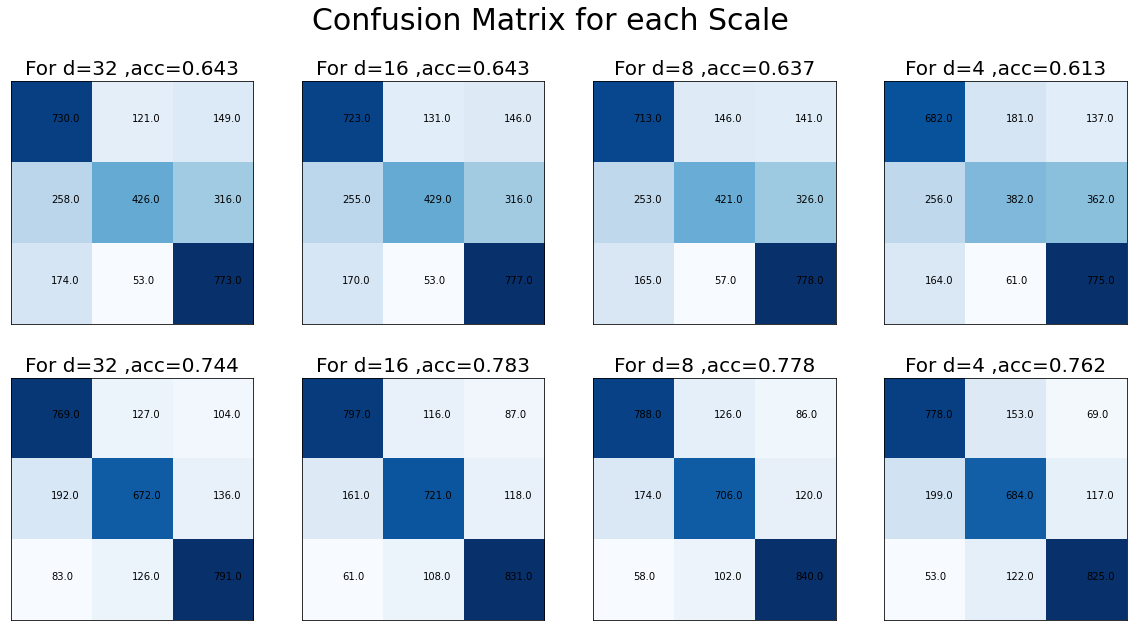

In [130]:
dims = [32,16,8,4,32,16,8,4]
fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Scale",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        axs[pi,pj].set_title("For d="+str(dims[index])+" ,acc="+str(np.round(np.diag(cm).sum()/3000,3)),fontsize=20)
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))

Text(0.5, 1.0, 'NB VS GM')

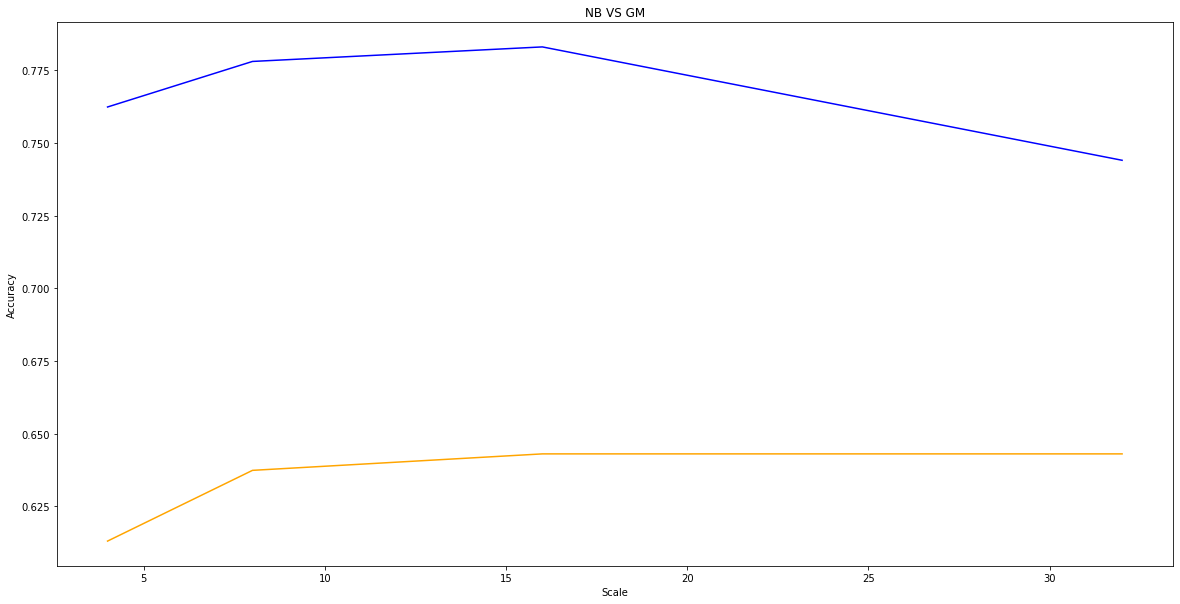

In [131]:
plt.figure(figsize=(20,10))
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_nb],color='orange')
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_gm],color='blue')
plt.xlabel('Scale')
plt.ylabel('Accuracy')
plt.title('NB VS GM')

<hr style="border:2px solid black"> </hr>

## Comment on the results ##


As shown above, we can deduce that the Generative model classifier has an overall better accuracy than the Naive Bayes Classifier. We can also deduce that the frog class had better accuracy in both classifiers than the airplane and automobile classes. Moreover, in the Generative model classifier, the accuracy of resizing the image has a better result than the original image(32,32). Finally, resizing down the image by (8,8) & (4,4) decreases the accuracy of the Naive Bayes classifier.